# Factors That Affect The Estimated Returns - A Case Study Of Prosper Loan Data.
## by Winnie Minayo


## Investigation Overview

For this analysis, I sought to discover the factors that affect the estimated returns for the prosper company. The major factors that were investigated were the borrower APR and borrower rate.



## Dataset Overview

The prosper loan dataset is one that contains the loan information of the prosper organisation. The data ranges from the details of people who have taken loans, the amount of loans taken, those paid and unpaid, and the returns of the organisation.It consists of 113,937 rows and 81 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv("D:\Data Analytics\Project_3\prosperLoanData.csv")
loan_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
#Choose the interested variables for analysis
newloan_df = loan_df[['LoanStatus','BorrowerAPR','BorrowerRate','IncomeRange','EmploymentStatus','ProsperPrincipalBorrowed','OnTimeProsperPayments','EstimatedReturn']]
newloan_df

,LoanStatus,BorrowerAPR,BorrowerRate,IncomeRange,EmploymentStatus,ProsperPrincipalBorrowed,OnTimeProsperPayments,EstimatedReturn
0,Completed,0.16516,0.1580,"$25,000-49,999",Self-employed,NaN,NaN,NaN
1,Current,0.12016,0.0920,"$50,000-74,999",Employed,NaN,NaN,0.05470
2,Completed,0.28269,0.2750,Not displayed,Not available,NaN,NaN,NaN
3,Current,0.12528,0.0974,"$25,000-49,999",Employed,NaN,NaN,0.06000
4,Current,0.24614,0.2085,"$100,000+",Employed,11000.0,11.0,0.09066
...,...,...,...,...,...,...,...,...
113932,Current,0.22354,0.1864,"$50,000-74,999",Employed,NaN,NaN,0.09500
113933,FinalPaymentInProgress,0.13220,0.1110,"$75,000-99,999",Employed,33501.0,60.0,0.08070
113934,Current,0.23984,0.2150,"$25,000-49,999",Employed,NaN,NaN,0.08578
113935,Completed,0.28408,0.2605,"$25,000-49,999",Full-time,5000.0,16.0,0.15950


In [4]:
# To get a sample of the dataset null values in the ProsperPrincipalBorrowed and EstimatedReturn variables are removed.
newloan_df = newloan_df.dropna(subset = ['ProsperPrincipalBorrowed', 'EstimatedReturn'])
newloan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19797 entries, 4 to 113935
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LoanStatus                19797 non-null  object 
 1   BorrowerAPR               19797 non-null  float64
 2   BorrowerRate              19797 non-null  float64
 3   IncomeRange               19797 non-null  object 
 4   EmploymentStatus          19797 non-null  object 
 5   ProsperPrincipalBorrowed  19797 non-null  float64
 6   OnTimeProsperPayments     19797 non-null  float64
 7   EstimatedReturn           19797 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


### Distribution of Estimated Returns.
The estimated returns variable is normally distributed with majority of the returns ranging between 0.05 to 0.15.

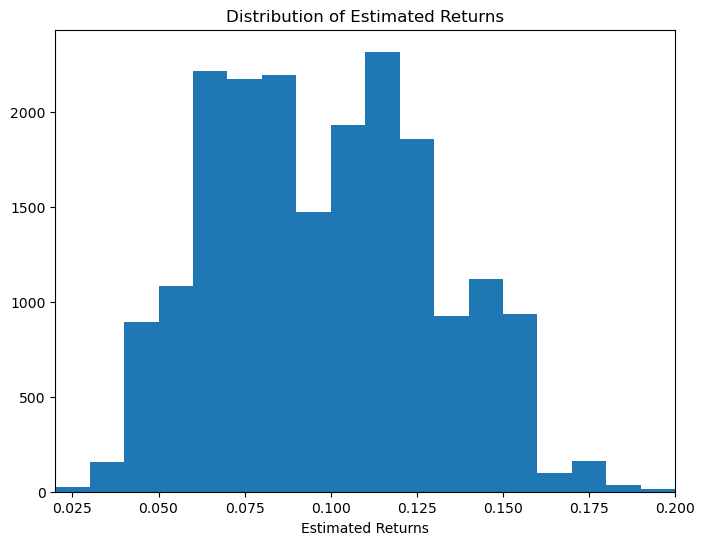

In [5]:
# A histogram is plotted to show distribution.
plt.figure(figsize=[8,6])
bins = np.arange(0,loan_df['EstimatedReturn'].max()+0.01,0.01 )

plt.hist(data = newloan_df, x='EstimatedReturn', bins = bins);
plt.xlim([0.02,0.20])
plt.title('Distribution of Estimated Returns')
plt.xlabel('Estimated Returns')
plt.show()

### Distribution of Borrower APR.
The distribution of borrower apr is normaly distributed with a high concentration at a range of 0.1 to 0.35 where a spike occures.

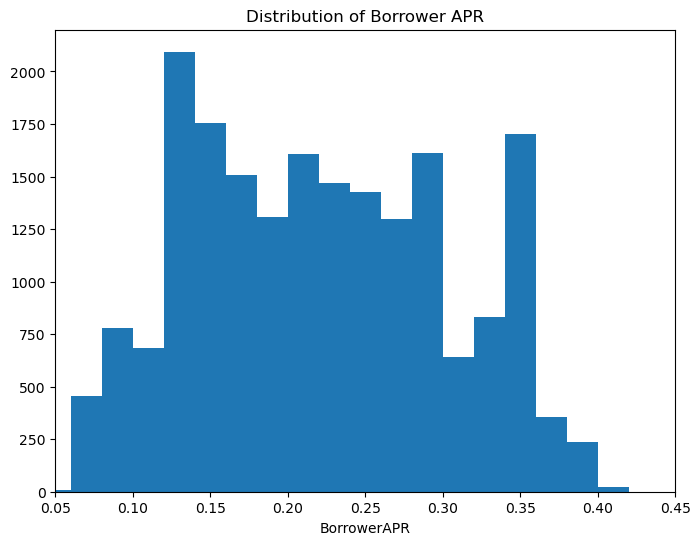

In [6]:
# A histogram is used to describe the distribution of APR.
plt.figure(figsize=[8,6])
bins = np.arange(0,loan_df['BorrowerAPR'].max()+0.02,0.02 )

plt.hist(data = newloan_df, x='BorrowerAPR', bins =bins);
plt.xlabel('BorrowerAPR');
plt.xlim([0.05,0.45])
plt.title('Distribution of Borrower APR')
plt.show()

### Distribution of Borrower Rate.
The borrower rate distribution appears is similar to the borrower apr distribution. Both have a normal distribution with a spike at the values close to 0.3. This means that the rates of APR and borrower interest rates on the loans borrowed are close in range.

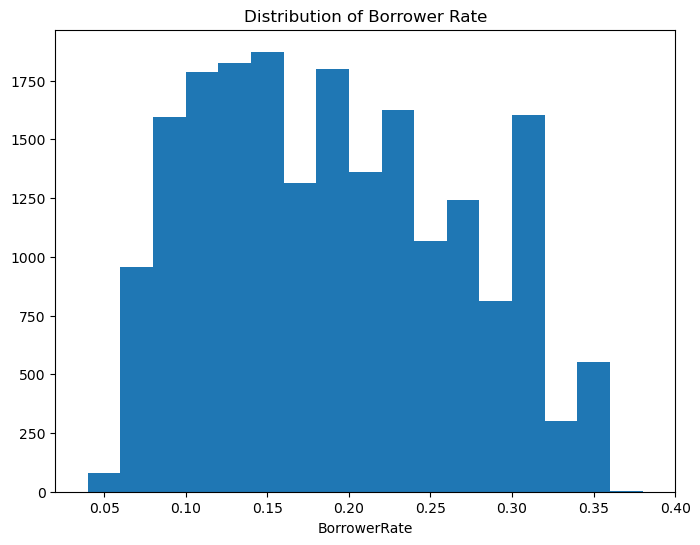

In [7]:
# A histogram is plotted to visualize the distribution.
plt.figure(figsize=[8,6])
bins = np.arange(0,loan_df['BorrowerRate'].max()+0.02,0.02 )

plt.hist(data = newloan_df, x='BorrowerRate', bins = bins );
plt.xlabel('BorrowerRate');
plt.xlim([0.02,0.4])
plt.title('Distribution of Borrower Rate')
plt.show()


### How does the borrower rate relate to estimated return?
There is a positive correlation between the two variables. High estimated returns are associated with high borrower rates.

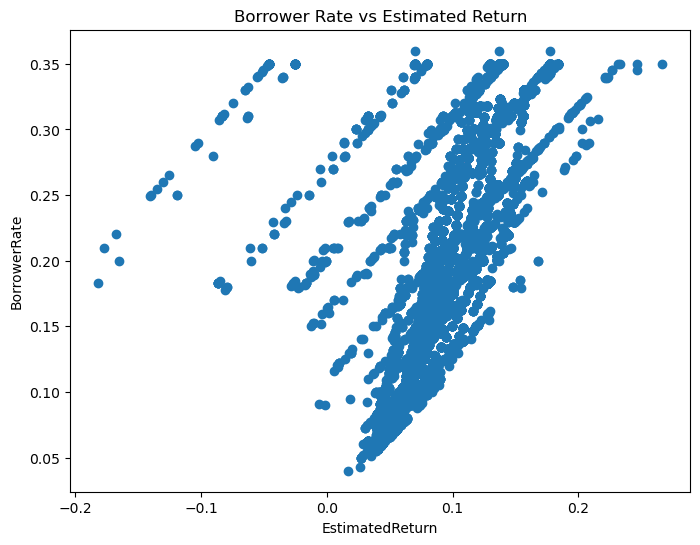

In [8]:
# A sactter plot is used to show the correlation.
plt.figure(figsize=[8,6])

plt.scatter(data=newloan_df, y ='BorrowerRate', x = 'EstimatedReturn');
plt.xlabel('EstimatedReturn');
plt.ylabel('BorrowerRate');
plt.title('Borrower Rate vs Estimated Return')
plt.show()

### How is the borrower rate and borrower apr affect the estimated return?
The borrower rate and borrower apr all show a positive correlation to estimated returns. An increase in the two variables means an increase in the expected returns.


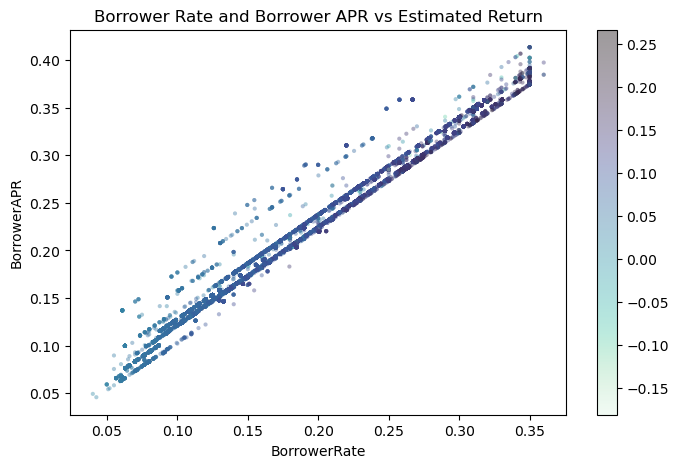

In [11]:
# A scatter plot is used to visualize the relationship.
plt.figure(figsize=[8,5])
plt.scatter(data = newloan_df, x = 'BorrowerRate', y = 'BorrowerAPR', c = 'EstimatedReturn',
            cmap = 'mako_r', alpha = 0.4, marker= '.', linewidth=0)
plt.colorbar()
plt.xlabel('BorrowerRate');
plt.ylabel('BorrowerAPR');
plt.title('Borrower Rate and Borrower APR vs Estimated Return')
plt.show()

In [ ]:
!jupyter nbconvert ProsperLoanAnalysis_P2.ipynb --to slides --post serve --no-input --no-prompt